# homework-6

In [14]:
import numpy as np
from numpy import concatenate as cc
import matplotlib.pyplot as plt
import time
import scienceplots

plt.style.use(['science', 'grid', 'custom', 'vibrant'])

In [3]:
# simulation parameters

np.random.seed(0)
step = 1
duration = 200 # ms
steps = int(duration/step)

threshold = 0.9 # for random spikes
spike_train = np.random.rand(steps) > threshold

Text(0, 0.5, 'Spike')

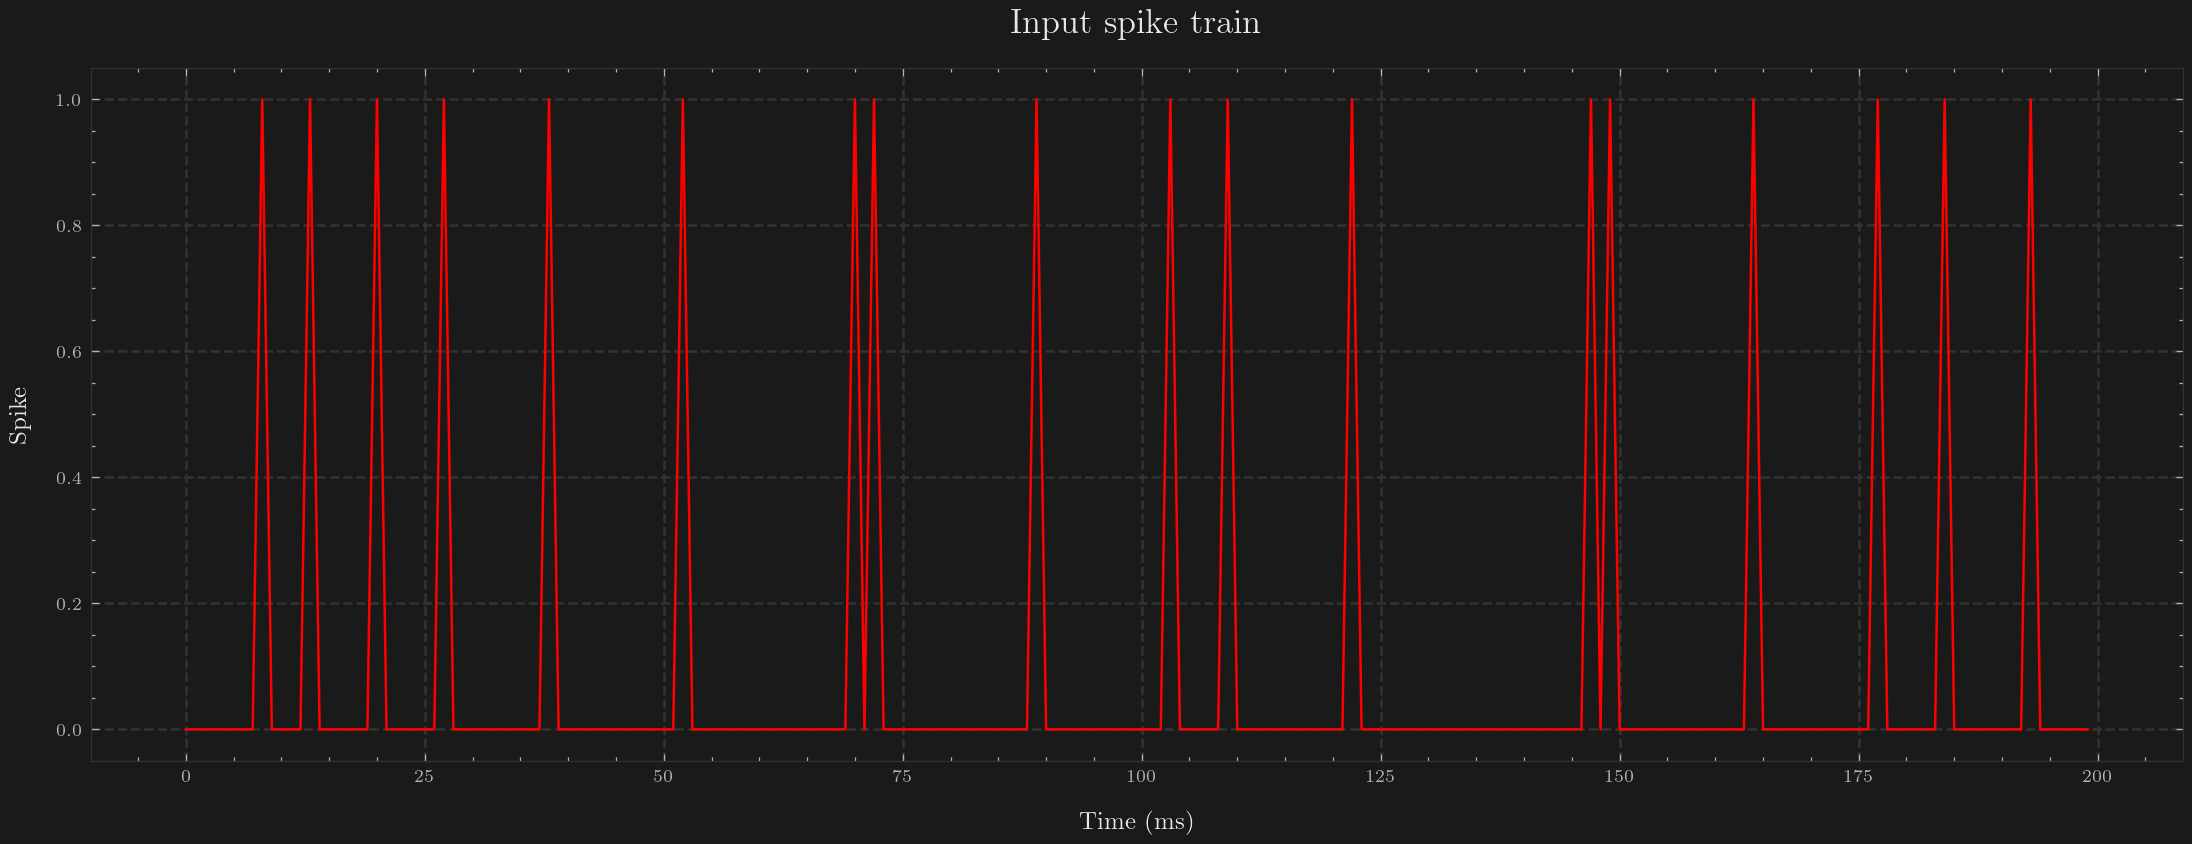

In [60]:
# spike train 

plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, duration, step), spike_train, color = 'red')
plt.title('Input spike train')
plt.xlabel('Time (ms)')
plt.ylabel('Spike')

In [42]:
# simulation

def LIFNeuron(t_peak):
    
    C = 0.5 # nF
    R = 40 # M ohms
    
    g_ad = 0
    G_inc = 1/step
    tau_ad = 2 # ms
    
    E_leak = -60 # mV
    E_syn = 0 # mV
    g_syn = 0 # nS

    V = E_leak
    V_th = -40 # mV
    V_spike = 50 # mV
    
    ref = 0
    ref_max = 4/step
    
    t_list = np.array([], dtype = int)
    
    spike_count = 0
    
    V_trace = [E_leak]
    t_trace = [0]

    t_syn = 100 # max duration of syn conductance

    g_peak = 0.05 # nS
    
    t = np.arange(0, t_syn + step, step)
    
    alpha = g_peak/(t_peak * np.exp(-1)) * t * np.exp(-t/t_peak)
    
    for i in range(steps):
        
        # compute input
        if spike_train[i]:
            t_list = cc([t_list, [1]])
            
        # calculate synaptic current
        g_syn = np.sum(alpha[t_list])
        I_syn = g_syn * (E_syn - V)
        
        # update spike times
        if np.any(t_list):
            t_list = t_list + 1
            if t_list[0] == t_syn:
                t_list = t_list[1:]
                
        # compute membrane voltage
        if not ref:
            V = V + step*(-((V - E_leak)*(1 + R*g_ad)/(R*C)) + I_syn/C)
            g_ad = g_ad + step*(-g_ad/tau_ad)
        else:    
            ref -= 1
            V = V_th - 10
            g_ad = 0
            
        # generate spike
        if (V > V_th) and not ref:
            V = V_spike
            spike_count += 1
            ref = ref_max
            g_ad = g_ad + G_inc
            
        V_trace += [V]
        t_trace += [i*step]
        
    # plt.figure(figsize=(7, 4))
    # plt.plot(t_trace, V_trace, color = 'red')
    # plt.xlabel('Time (ms)')
    # plt.ylabel('Membrane Potential (mV)')
    # plt.title('Response of a LIF neuron to an input spike train')
    # plt.tight_layout()
    # plt.show()
    
    return spike_count

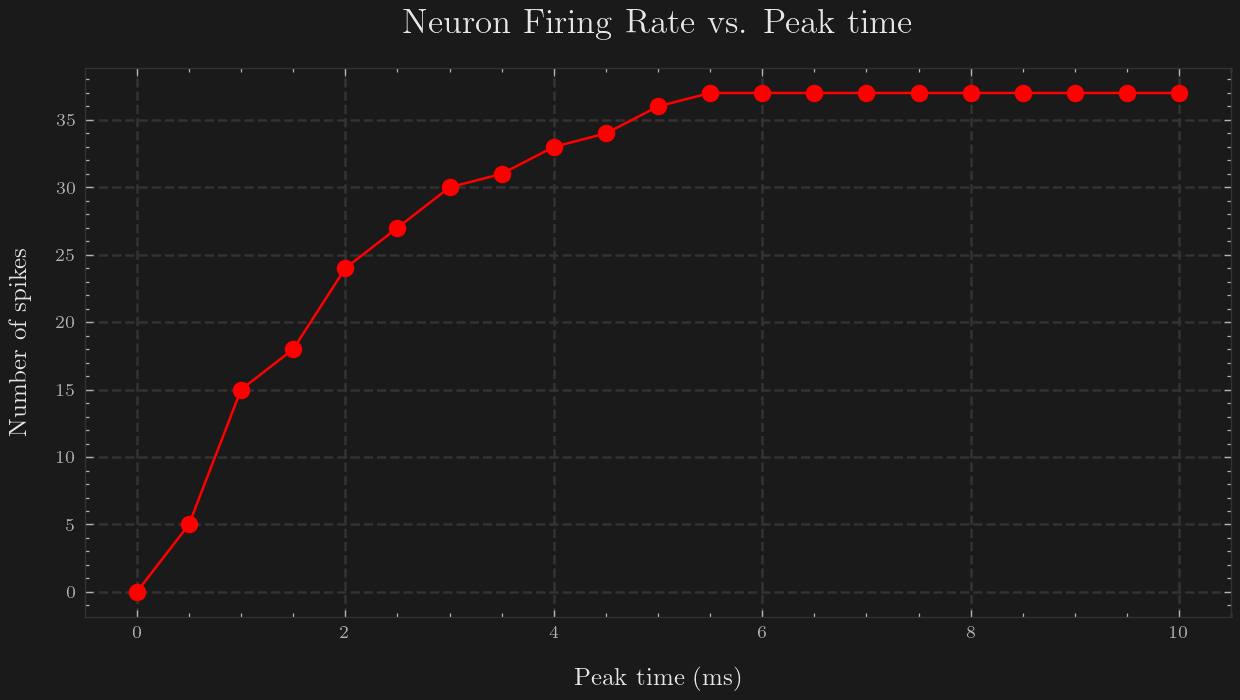

In [65]:
t_peak_values = np.arange(0.5, 10.5, 0.5)
spike_counts = np.zeros(len(t_peak_values))
for i, t_peak in enumerate(t_peak_values):
    spike_counts[i] = LIFNeuron(t_peak)

plt.figure(figsize=(7, 4))
plt.plot(peak_times, spikes, 'ro-')
plt.xlabel('Peak time (ms)')
plt.ylabel('Number of spikes')
plt.title('Neuron Firing Rate vs. Peak time')
plt.tight_layout()
plt.show()

In [53]:
# Given matrices and vector
W = np.array([
    [0.6, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.6, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.6, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.6]
])

u = np.array([0.6, 0.5, 0.6, 0.2, 0.1])

M = np.array([
    [-0.125, 0, 0.125, 0.125, 0],
    [0, -0.125, 0, 0.125, 0.125],
    [0.125, 0, -0.125, 0, 0.125],
    [0.125, 0.125, 0, -0.125, 0],
    [0, 0.125, 0.125, 0, -0.125]
])

# Steady-state condition: v_ss = W * u + M * v_ss
# To solve for v_ss, rearrange to (I - M) * v_ss = W * u

I = np.eye(5)  # Identity matrix
v_ss = np.linalg.solve(I - M, W @ u)
v_ss

array([0.5470305 , 0.47961477, 0.54253612, 0.38073836, 0.33579454])